# 1. feladat

Az https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv adatbázis StarCraft2 játékosok statisztikáit tartalmazza. Kérdés, hogy ezekből az adatokból mennyire jelezhető előre, hogy melyik ligában játszik a játékos.

Hajts végre regressziós gépi tanulási kísérletet a `LeagueIndex` célváltozón (1-8 intervallum), úgy hogy a `GameID > 7000` játékosokat használod kiértékelő adatbázisnak.

Vigyázz! Az adatbázisban `?` jelöli a hiányzó értékeket.


In [ ]:
import pandas as pd
# töltsük be az adatbázist
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv",na_values="?")
df.head() # nézzünk rá!

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [ ]:
df.describe()
df[df.GameID > 7000].shape #kiértékelő adathalmaz mérete

(886, 20)

In [ ]:
df=df.dropna() #mivel vannak NAN értékek az adatbázisban, most kidobjuk őket, hogy ne okozzanak gondot később
df.shape #az egész adatbázis mérete

(3338, 20)

Jól látható, hogy a tanító adatbázis jóval nagyobb, mint a kiértékelő és ez rendben is van így. A tanítóé 3338-886=2452 sorból áll, a kiértékelőé meg 886-ból.

In [ ]:
features = df.loc[:,"Age":]
df.loc[:,"Age":] # jellemzők az Age változó szerint

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,20.0,8.0,400.0,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,16.0,56.0,1500.0,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,21.0,8.0,100.0,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,20.0,28.0,400.0,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [ ]:
# szétválasztjuk a tanító- és teszthalmazokat, különvéve a jellemzőket és az osztálycímkét
trainFeatures = df[df.GameID <= 7000].loc[:,"Age":] # A 7000-nél kisebb egyenlőek Age szerint, tanító adatbázis része
trainLabels = df[df.GameID <= 7000].LeagueIndex # A 7000-nél kisebb egyenlőek osztálycímke(LeagueIndex) szerint, tanító adatbázis része
testFeatures = df[df.GameID > 7000].loc[:,"Age":] # A 7000-nél nagyobbak Age szerint a kiértékelő adatbázison
testLabels =  df[df.GameID > 7000].LeagueIndex # A 7000-nél nagyobbak a célváltozó szerint a kiértékelő adatbázison

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_leaf=50) #DecisionTreeRegressor (azaz döntési fa regresszióra) használata
dt.fit(trainFeatures, trainLabels) # tanítás a tanító adatbázison
prediction = dt.predict(testFeatures) # predikció a kiértékelő adatbázison

In [ ]:
from sklearn.metrics import mean_squared_error # MSE (RMSE végső gyökvonás nélkül)
mean_squared_error(prediction, testLabels) #MSE meghatározása

1.0257011521646264

És megkaptuk a Mean Squared Errort, 1,0257. Minél alacsonyabb ez az érték, annál jobb.

In [ ]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean') # tanító adatbázis címkéinek átlaga lesz mindig a predikció
dummy.fit(trainFeatures, trainLabels)
mean_squared_error(dummy.predict(testFeatures), testLabels)

2.009929291790602

Ez pedig a baseline eredménye, amit -mivel regressziós feladatról van szó- DummyRegressor-ral kaptam meg. Itt a hiba 2 felett van és mondtam, hogy akkor lesz minél jobb az érték, minél kisebb. A korábban kapott 1,0257 majdnem feleannyi, mint a baseline 2,0099-es errorja, ami nekünk jó hír.:)

# 2. feladat
Melyik jellemző a legfontosabb a regressziós modellben?

Építs erre az egy jellemzőre egy döntési modellt (akár kézzel, akár gépi tanulva)!

In [ ]:
dt = DecisionTreeRegressor(max_depth=1)

dt.fit(trainFeatures, trainLabels) # tanítás a tanító adatbázison

DecisionTreeRegressor(max_depth=1)

In [ ]:
root = dt.tree_.feature[0] # gyökércsúcsban lévő feature indexe
trainFeatures.columns[root] # a legfontosabb jellemző kinyerése

'ActionLatency'

Az ActionLatency lesz a legfontosabb jellemző.

In [ ]:
prediction = dt.predict(testFeatures) # predikció a kiértékelő adathalmazon
mean_squared_error(prediction, testLabels)

1.458830846337093

A döntési modellre kapott átlagos négyzetes hiba (MSE): 1,4588. Minél kisebb az érték, annál jobb, mivel hibát mérünk.

# 3. feladat

A jellemzők alapján csinálj egy 2D leképezést és ebben a térben jelenítsd meg az egyedeket. Az egyedekhez tartozó jelek színe legyen az életkor (tipp: használhatod a `cmap='Spectral'` argumentumot a plothoz)

In [ ]:
### SVD dimenzió csökkentés:
# ha 2D a cél, akkor a két legnagyobb sajátértékhez tartozó sajátvektorokat vegyük csak figyelembe
# ezeket az oszlopokat fel tudjuk használni arra, hogy vizualizáljunk
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) # az első 2 komponenst tartjuk csak meg (2Dbe mappelünk)
m2d = svd.fit_transform(features) # az adatbázison megcsinálja a leképezést
m2d

array([[3000.09635795,  153.83006405],
       [5000.08722845,  139.55533942],
       [ 200.06171505,  110.49274748],
       ...,
       [ 100.08668685,  143.20552252],
       [ 400.09343758,  152.08053774],
       [ 400.06954613,  119.57098179]])

In [ ]:
from sklearn.cluster import KMeans
k=10
kmeans = KMeans(n_clusters=k).fit(m2d)

In [ ]:
kmeans.cluster_centers_

array([[ 1.94729815e+02,  1.27561916e+02],
       [ 9.99999985e+05, -3.35265711e+02],
       [ 2.50001481e+04,  2.20669197e+02],
       [ 1.33768088e+03,  1.58945403e+02],
       [ 8.27333820e+02,  1.50634048e+02],
       [ 4.80010665e+03,  1.69965169e+02],
       [ 1.90001282e+04,  1.98679023e+02],
       [ 9.75342579e+03,  1.49216672e+02],
       [ 2.17999974e+03,  1.67403834e+02],
       [ 5.01953811e+02,  1.39682597e+02]])

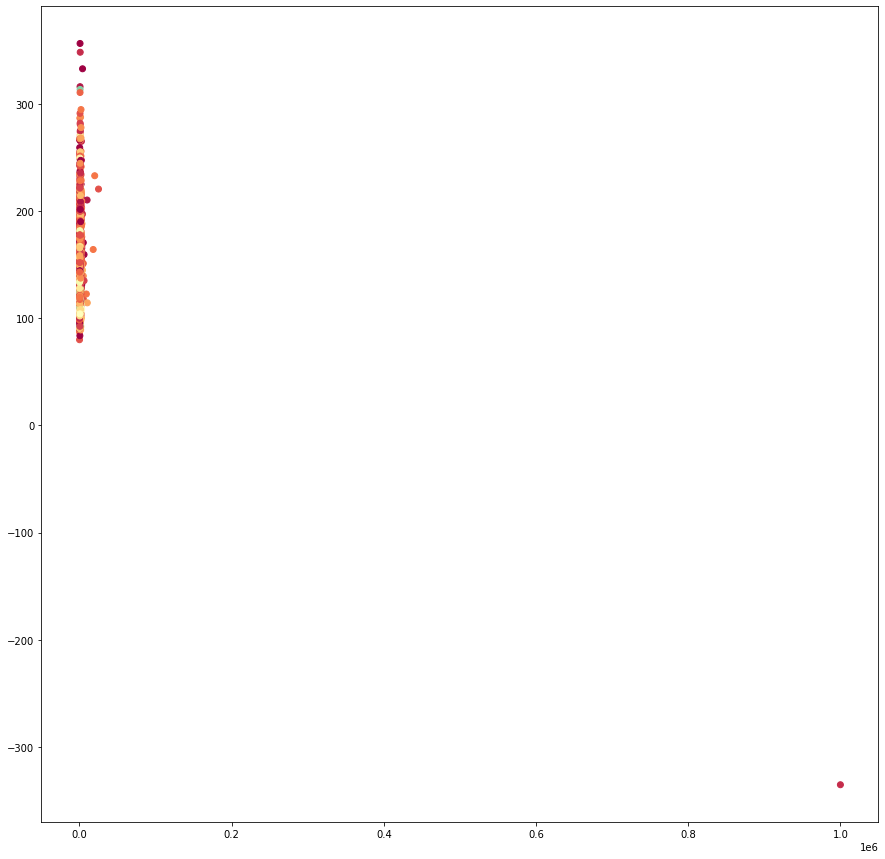

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))       # beállítjuk a kép méretét, a default érték pici
plt.scatter( m2d[:,0],   # minden pont egy film, aminek x koordinátája az SVD leképezés első komponense
             m2d[:,1],   # y koordinátája az SVD leképezés második komponense (2D)
             c=df["Age"], cmap='Spectral') # színe pedig adott, hogy az életkor alapján legyen beállítva

Vagy tényleg ennyiből áll a plot, mert leredukáltuk 2D-re, vagy ami a másik (talán valószínűbb) opció: valami érezhetően nincs rendben, csak nem tudok rájönni, mi...:D